## 기존 강의가 2020.6.30. 기준이므로 2020.6.30 까지 데이터를 스크래핑

In [4]:
import pandas as pd
import numpy as np

In [5]:
# 데이터 스크래핑용
import requests
import time
from tqdm import trange

In [6]:
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [7]:
table = pd.read_html(url)
len(table)

8

In [8]:
df_columns_name = table[5]
df_columns_name

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [9]:
# 1목록과 2목록의 차이는 ajax(_pre)
# 강의와는 다르게 draw는 영향을 미치지 않는 것을 확인
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax_pre.php?"
# url = "&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&order%5B0%5D%5Bcolumn%5D=0&order%5B0%5D%5Bdir%5D=desc"
url = f"{url}start=700&length=100"
# url = "&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1631860219066"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax_pre.php?start=700&length=100'

In [10]:
response = requests.get(url)
data_json = response.json()
pd.DataFrame(data_json['data'])

,0,1,2,3,4,5,6
0,<p class='corona19_no'>39300</p>,126484,2021-05-07,강남구,-,강남구 소재 학원 관련('21.5.),<b class='status1'>퇴원</b>
1,<p class='corona19_no'>39299</p>,126327,2021-05-07,송파구,-,동작구 소재 시장 관련,<b class='status1'>퇴원</b>
2,<p class='corona19_no'>39298</p>,126432,2021-05-07,은평구,-,은평구 소재 종교시설 관련('21.5.(2)),<b class='status1'>퇴원</b>
3,<p class='corona19_no'>39297</p>,126330,2021-05-07,송파구,-,동작구 소재 시장 관련,<b class='status1'>퇴원</b>
4,<p class='corona19_no'>39296</p>,126551,2021-05-07,강남구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>39205</p>,126290,2021-05-07,강서구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>39204</p>,126261,2021-05-07,동대문구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>39203</p>,126567,2021-05-07,강남구,-,강남구 소재 학원 관련('21.5.),<b class='status1'>퇴원</b>
98,<p class='corona19_no'>39202</p>,126532,2021-05-07,도봉구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>


In [11]:
record_total = data_json['recordsTotal']
record_total

40000

In [12]:
def get_seoul_covid19_100(page_no):
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax_pre.php?"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [13]:
# 데이터 있을 때
get_seoul_covid19_100(10)

{'draw': 1,
 'recordsTotal': 40000,
 'recordsFiltered': 40000,
 'data': [["<p class='corona19_no'>39100</p>",
   '125838',
   '2021-05-06',
   '영등포구',
   '-',
   '기타 확진자 접촉',
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39099</p>",
   '125839',
   '2021-05-06',
   '영등포구',
   '-',
   "중구 소재 직장 관련('21.5.)",
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39098</p>",
   '125768',
   '2021-05-06',
   '노원구',
   '-',
   '강북구 소재 노래연습장 관련',
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39097</p>",
   '125859',
   '2021-05-06',
   '금천구',
   '-',
   '타시도(고양시) 음식점 관련',
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39096</p>",
   '125603',
   '2021-05-06',
   '노원구',
   '-',
   "중구 소재 직장 관련('21.5.)",
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39095</p>",
   '125702',
   '2021-05-06',
   '노원구',
   '-',
   '기타 확진자 접촉',
   "<b class='status1'>퇴원</b>"],
  ["<p class='corona19_no'>39094</p>",
   '125836',
   '2021-05-06',
   '영등포구',

In [14]:
# 데이터 없을 때
get_seoul_covid19_100(401)

{'draw': 1, 'recordsTotal': 40000, 'recordsFiltered': 40000, 'data': []}

In [15]:
page_list = []
all_page = 7
for page_no in trange(1, all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page['data'])
    page_list.append(one_page)
    time.sleep(0.5)

100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


In [16]:
pd.concat(page_list)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>40000</p>,128607,2021-05-11,서초구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
1,<p class='corona19_no'>39999</p>,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),<b class='status1'>퇴원</b>
2,<p class='corona19_no'>39998</p>,128347,2021-05-11,강북구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
3,<p class='corona19_no'>39997</p>,128724,2021-05-11,강남구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
4,<p class='corona19_no'>39996</p>,128478,2021-05-11,양천구,-,감염경로 조사중,<b class='status1'>퇴원</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>39305</p>,126344,2021-05-07,성북구,-,병원 및 요양시설,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>39304</p>,126335,2021-05-07,송파구,-,동작구 소재 시장 관련,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>39303</p>,126593,2021-05-07,강남구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>39302</p>,126485,2021-05-07,강남구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>


In [17]:
def get_range_pages(start_page, end_page):
    page_list = []
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        if len(one_page['data']) > 0:
            one_page = pd.DataFrame(one_page['data'])
            page_list.append(one_page)
            time.sleep(0.5)
        else:
            return page_list
    return page_list

In [18]:
# 강의와 변형된 코드로 진행하였으므로 확인 필요
start_page = 1
end_page = 10
page_list = get_range_pages(start_page, end_page)

100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


In [19]:
pd.concat(page_list)
# 이상 없음

,0,1,2,3,4,5,6
0,<p class='corona19_no'>40000</p>,128607,2021-05-11,서초구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
1,<p class='corona19_no'>39999</p>,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),<b class='status1'>퇴원</b>
2,<p class='corona19_no'>39998</p>,128347,2021-05-11,강북구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
3,<p class='corona19_no'>39997</p>,128724,2021-05-11,강남구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
4,<p class='corona19_no'>39996</p>,128478,2021-05-11,양천구,-,감염경로 조사중,<b class='status1'>퇴원</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>39005</p>,125679,2021-05-06,도봉구,-,강북구 소재 PC방 관련,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>39004</p>,125605,2021-05-06,은평구,-,서대문구 소재 종교시설 관련('21.5.),<b class='status1'>퇴원</b>
97,<p class='corona19_no'>39003</p>,125678,2021-05-06,서초구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>39002</p>,125800,2021-05-06,도봉구,-,강북구 소재 PC방 관련,<b class='status1'>퇴원</b>


In [20]:
# 2020.6.30. 기준으로 만들기 위해 해당 일자까지 데이터만 스크래핑하려 했으나 
# 방법을 알지 못하여 모든 자료를 받아 df로 만든 후 필터링 진행
start_page = 1
end_page = 400
page_list = get_range_pages(start_page, end_page)
len(page_list)

100%|██████████| 400/400 [06:34<00:00,  1.01it/s]


400

In [21]:
# 데이터 확인
page_list[300:301]
# 이상 없음

[                                   0      1           2    3  4  \
 0   <p class='corona19_no'>10000</p>  37131  2020-12-05  금천구  -   
 1    <p class='corona19_no'>9999</p>  37141  2020-12-05  금천구  -   
 2    <p class='corona19_no'>9998</p>  37541  2020-12-05  송파구  -   
 3    <p class='corona19_no'>9997</p>  37542  2020-12-05  송파구  -   
 4    <p class='corona19_no'>9996</p>  37087  2020-12-05  서초구  -   
 ..                               ...    ...         ...  ... ..   
 95   <p class='corona19_no'>9905</p>  36753  2020-12-04  강남구  -   
 96   <p class='corona19_no'>9904</p>  36734  2020-12-04  성동구  -   
 97   <p class='corona19_no'>9903</p>  36732  2020-12-04  서초구  -   
 98   <p class='corona19_no'>9902</p>  36751  2020-12-04  강남구  -   
 99   <p class='corona19_no'>9901</p>  36727  2020-12-04  은평구  -   
 
                  5                          6  
 0   구로구 소재 보험회사 관련  <b class='status1'>퇴원</b>  
 1        기타 확진자 접촉  <b class='status1'>퇴원</b>  
 2        기타 확진자 접촉  <b class='stat

In [22]:
df_all = pd.concat(page_list)
df_all.shape

(40000, 7)

In [23]:
cols = table[5].columns.tolist()

In [24]:
df_all.columns = cols

In [25]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>40000</p>,128607,2021-05-11,서초구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
1,<p class='corona19_no'>39999</p>,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),<b class='status1'>퇴원</b>
2,<p class='corona19_no'>39998</p>,128347,2021-05-11,강북구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
3,<p class='corona19_no'>39997</p>,128724,2021-05-11,강남구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
4,<p class='corona19_no'>39996</p>,128478,2021-05-11,양천구,-,감염경로 조사중,<b class='status1'>퇴원</b>


# 데이터 전처리

In [26]:
import re

In [27]:
def extract_number(num_string):
    if type(num_string) == str:
        num_string = num_string.replace("corona19", "")
        num = re.sub("[^0-9]", "", num_string)
        num = int(num)
        return num
    else:
        return num_string

In [28]:
#테스트
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

7625

In [29]:
df_all['연번'] = df_all['연번'].map(extract_number)

In [30]:
df_all['연번'].head()

0    40000
1    39999
2    39998
3    39997
4    39996
Name: 연번, dtype: int64

In [31]:
def extract_hanguel(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [32]:
df_all['퇴원현황'] = df_all['퇴원현황'].map(extract_hanguel)

In [33]:
df_all['퇴원현황'].head()

0    퇴원
1    퇴원
2    퇴원
3    퇴원
4    퇴원
Name: 퇴원현황, dtype: object

In [34]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,40000,128607,2021-05-11,서초구,-,기타 확진자 접촉,퇴원
1,39999,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),퇴원
2,39998,128347,2021-05-11,강북구,-,기타 확진자 접촉,퇴원
3,39997,128724,2021-05-11,강남구,-,기타 확진자 접촉,퇴원
4,39996,128478,2021-05-11,양천구,-,감염경로 조사중,퇴원


In [35]:
df_all.dtypes

연번       int64
환자      object
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [36]:
df_all['확진일'] = pd.to_datetime(df_all['확진일'])

In [54]:
df_6_30 = df_all[df_all.확진일 <= '2020-6-30']

In [55]:
df_6_30['확진일'] = df_6_30.loc[:,'확진일'].apply(lambda x: x.strftime('%Y-%m-%d'))

<ipython-input-55-21f5d0963399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_30['확진일'] = df_6_30.loc[:,'확진일'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [56]:
df_6_30.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
76,1324,12856,2020-06-30,서초구,-,강남역삼동금융회사,퇴원
79,1321,12830,2020-06-30,영등포구,-,기타 확진자 접촉,퇴원
80,1320,12829,2020-06-30,관악구,-,감염경로 조사중,퇴원
81,1319,12831,2020-06-30,영등포구,-,감염경로 조사중,퇴원
82,1318,12808,2020-06-30,관악구,-,강남구 역삼동 모임,퇴원


In [57]:
last_date = df_6_30.iloc[0]['확진일']
last_date

'2020-06-30'

In [58]:
file_name = f"seoul-covid19-{last_date}.csv"
file_name

'seoul-covid19-2020-06-30.csv'

In [59]:
df_6_30.to_csv(file_name, index=False)

In [60]:
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1324,12856,2020-06-30,서초구,-,강남역삼동금융회사,퇴원
1,1321,12830,2020-06-30,영등포구,-,기타 확진자 접촉,퇴원
2,1320,12829,2020-06-30,관악구,-,감염경로 조사중,퇴원
3,1319,12831,2020-06-30,영등포구,-,감염경로 조사중,퇴원
4,1318,12808,2020-06-30,관악구,-,강남구 역삼동 모임,퇴원
...,...,...,...,...,...,...,...
1317,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
1318,4,7,2020-01-30,마포구,중국,해외유입,퇴원
1319,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
1320,2,5,2020-01-30,중랑구,중국,해외유입,퇴원


# 데이터 분석

In [61]:
df_6_30 = df_6_30.sort_values(by="연번", ascending=False)

In [62]:
df_6_30.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
76,1324,12856,2020-06-30,서초구,-,강남역삼동금융회사,퇴원
79,1321,12830,2020-06-30,영등포구,-,기타 확진자 접촉,퇴원
80,1320,12829,2020-06-30,관악구,-,감염경로 조사중,퇴원
81,1319,12831,2020-06-30,영등포구,-,감염경로 조사중,퇴원
82,1318,12808,2020-06-30,관악구,-,강남구 역삼동 모임,퇴원


In [65]:
df_6_30 = df_6_30.reset_index(drop=True)
df_6_30.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,1324,12856,2020-06-30,서초구,-,강남역삼동금융회사,퇴원
1,1321,12830,2020-06-30,영등포구,-,기타 확진자 접촉,퇴원
2,1320,12829,2020-06-30,관악구,-,감염경로 조사중,퇴원
3,1319,12831,2020-06-30,영등포구,-,감염경로 조사중,퇴원
4,1318,12808,2020-06-30,관악구,-,강남구 역삼동 모임,퇴원


In [66]:
df_6_30.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1317,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
1318,4,7,2020-01-30,마포구,중국,해외유입,퇴원
1319,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
1320,2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1321,1,2,2020-01-24,강서구,중국,해외유입,퇴원


In [70]:
import matplotlib.pyplot as plt
# 한글 폰트
plt.rc("font", family='AppleGothic')
# 윈도우일때는 family='Malgun Gothic'

# 마이너스 기호
plt.rc("axes", unicode_minus=False)

# 스타일
plt.style.use('fivethirtyeight')

In [68]:
# 레티나 해상도 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 3 확진일

In [80]:
df_6_30["확진일"].value_counts()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    28
2020-03-09    26
              ..
2020-04-30     1
2020-04-19     1
2020-05-01     1
2020-04-24     1
2020-05-17     1
Name: 확진일, Length: 127, dtype: int64

In [81]:
df_6_30['확진일'] = pd.to_datetime(df_6_30['확진일'])

In [82]:
# 월 추출
df_6_30['월'] = df_6_30['확진일'].dt.month

In [83]:
# 주 추출
df_6_30['주'] = df_6_30['확진일'].dt.week
df_6_30[['확진일', '월', '주']].head()

<ipython-input-83-2f279438bf1d>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_6_30['주'] = df_6_30['확진일'].dt.week


,확진일,월,주
0,2020-06-30,6,27
1,2020-06-30,6,27
2,2020-06-30,6,27
3,2020-06-30,6,27
4,2020-06-30,6,27


## 3.1 선그래프 그리기

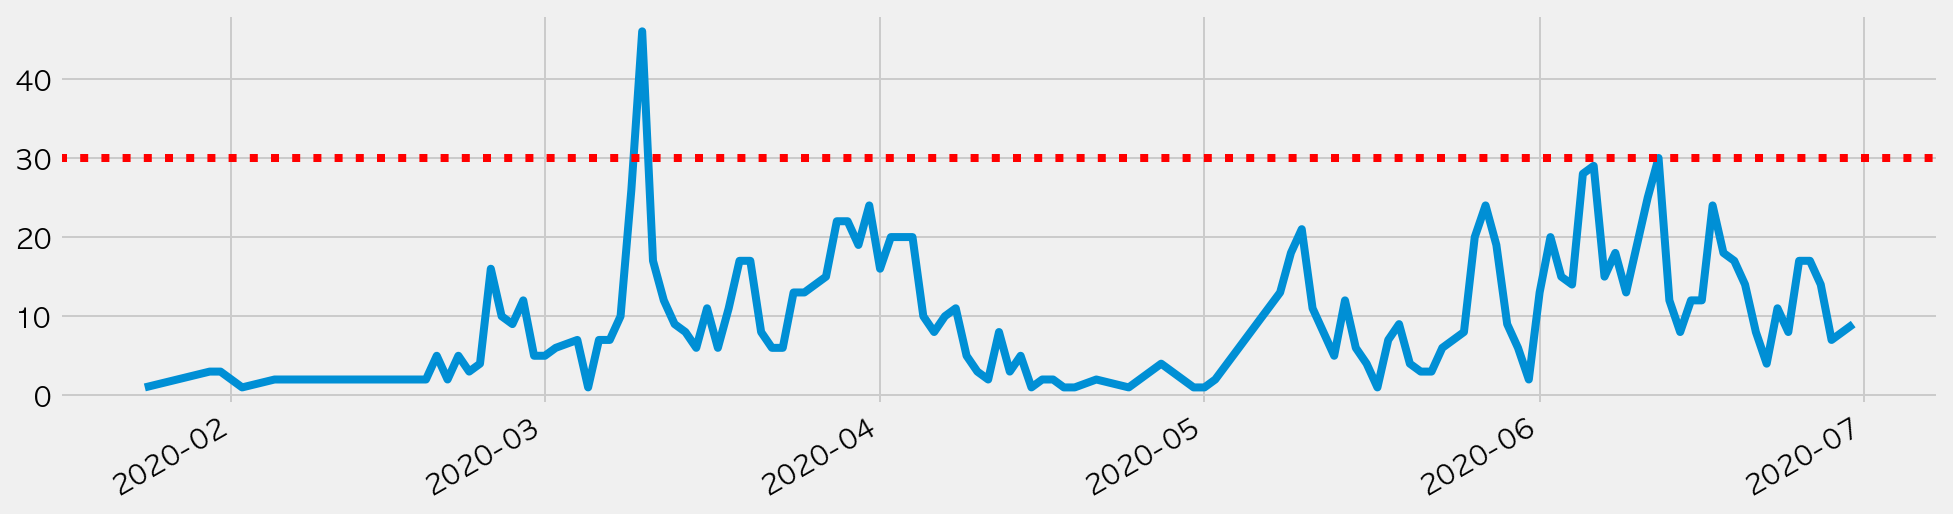

In [84]:
df_6_30['확진일'].value_counts().plot(figsize=(15, 4))
plt.axhline(30, color='red', linestyle=':')

<AxesSubplot:>

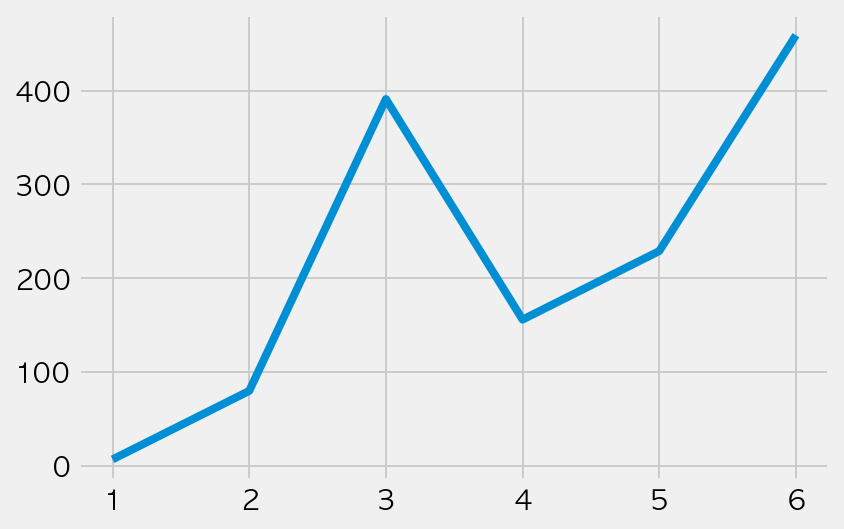

In [86]:
df_6_30['월'].value_counts().sort_index().plot()

## 3.2 선그래프에 값 표시하기

<AxesSubplot:>

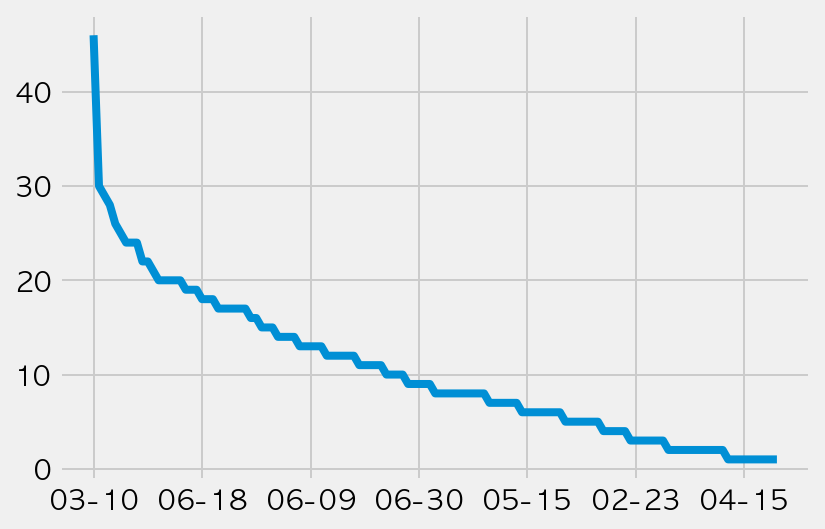

In [87]:
# '월일' 칼럼을 만들고 확진자 수대로 일자 정렬
df_6_30['월일'] = df_6_30['확진일'].astype(str).map(lambda x : x[-5:])
df_6_30['월일'].value_counts().plot()

<AxesSubplot:>

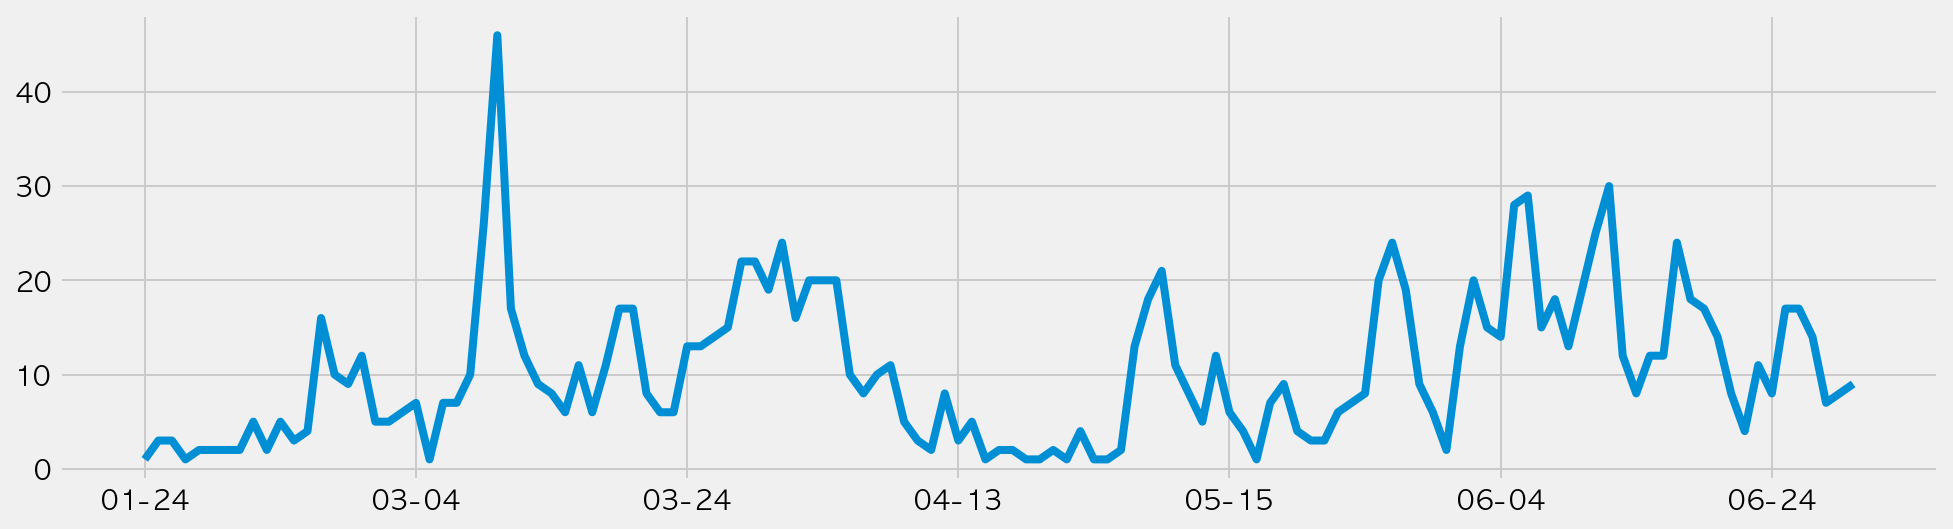

In [92]:
# 시간순으로 정렬
df_6_30['월일'].value_counts().sort_index().plot(figsize = (15, 4))

In [90]:
day_count = df_6_30['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     9
Name: 월일, Length: 127, dtype: int64

In [93]:
for i in range(len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 2
6 2
7 2
8 5
9 2
10 5
11 3
12 4
13 16
14 10
15 9
16 12
17 5
18 5
19 6
20 7
21 1
22 7
23 7
24 10
25 26
26 46
27 17
28 12
29 9
30 8
31 6
32 11
33 6
34 11
35 17
36 17
37 8
38 6
39 6
40 13
41 13
42 14
43 15
44 22
45 22
46 19
47 24
48 16
49 20
50 20
51 20
52 10
53 8
54 10
55 11
56 5
57 3
58 2
59 8
60 3
61 5
62 1
63 2
64 2
65 1
66 1
67 2
68 1
69 4
70 1
71 1
72 2
73 13
74 18
75 21
76 11
77 8
78 5
79 12
80 6
81 4
82 1
83 7
84 9
85 4
86 3
87 3
88 6
89 7
90 8
91 20
92 24
93 19
94 9
95 6
96 2
97 13
98 20
99 15
100 14
101 28
102 29
103 15
104 18
105 13
106 19
107 25
108 30
109 12
110 8
111 12
112 12
113 24
114 18
115 17
116 14
117 8
118 4
119 11
120 8
121 17
122 17
123 14
124 7
125 8
126 9


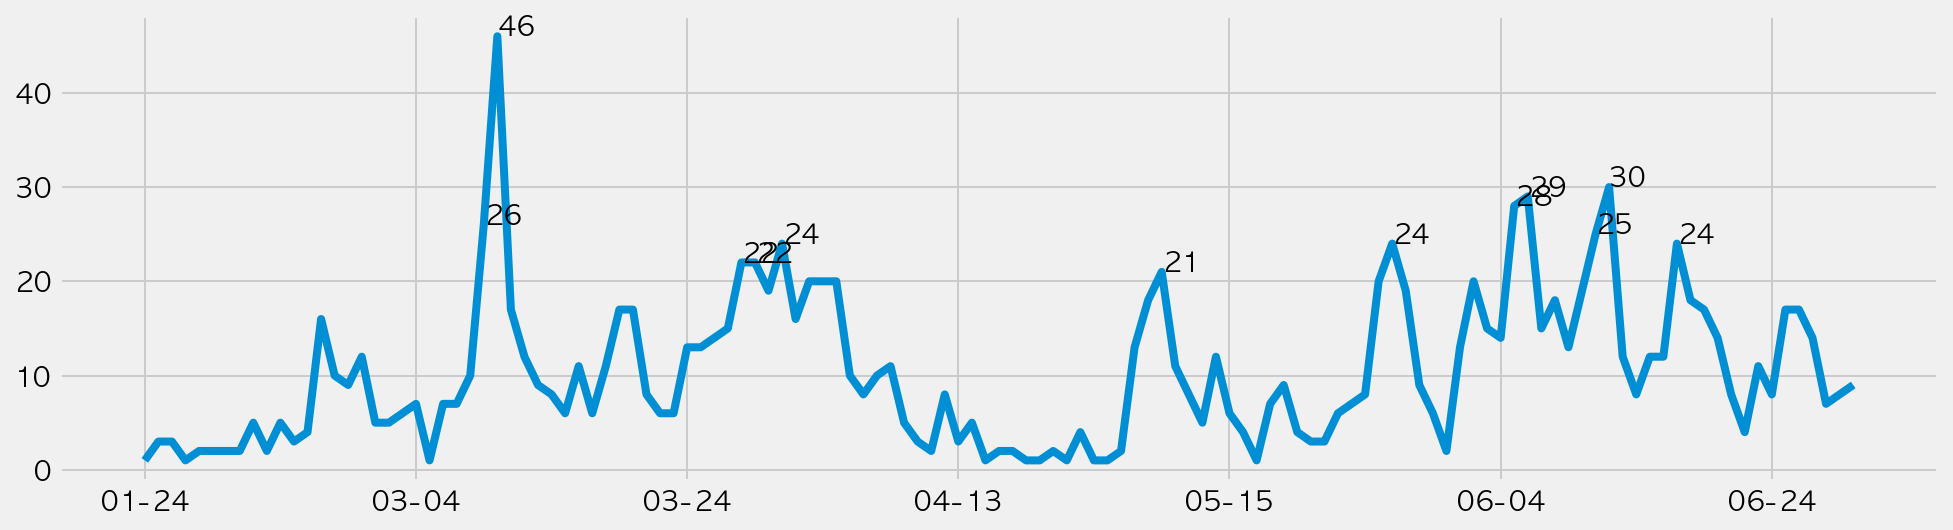

In [94]:
g = day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

## 3.3 확진자가 가장 많이 나온 날

In [23]:
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [143]:
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [145]:
df_6_30[df_6_30["월일"] == '03-10'].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,주,월일
1120,202,7567,2020-03-10,노원구,-,Ace 손해보험,퇴원,3,11,03-10
1121,201,7711,2020-03-10,노원구,-,Ace 손해보험,퇴원,3,11,03-10
1122,200,7555,2020-03-10,구로구,-,Ace 손해보험,퇴원,3,11,03-10
1123,199,7725,2020-03-10,양천구,-,Ace 손해보험,퇴원,3,11,03-10
1124,198,7539,2020-03-10,양천구,-,Ace 손해보험,퇴원,3,11,03-10


## 3.4 막대그래프 그리기

<AxesSubplot:>

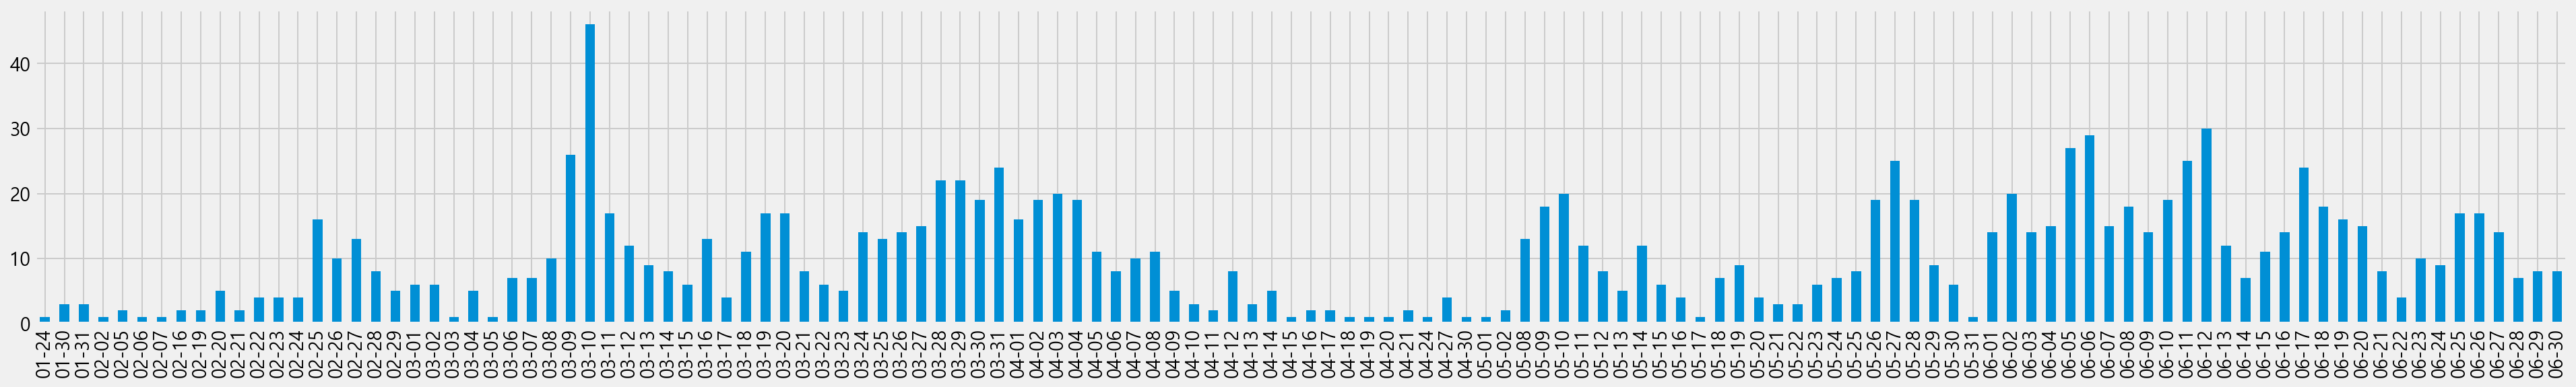

In [37]:
day_count.plot.bar(figsize=(30,4))

## 3.5 최근 데이터만 슬라이싱으로 나눠 그리기

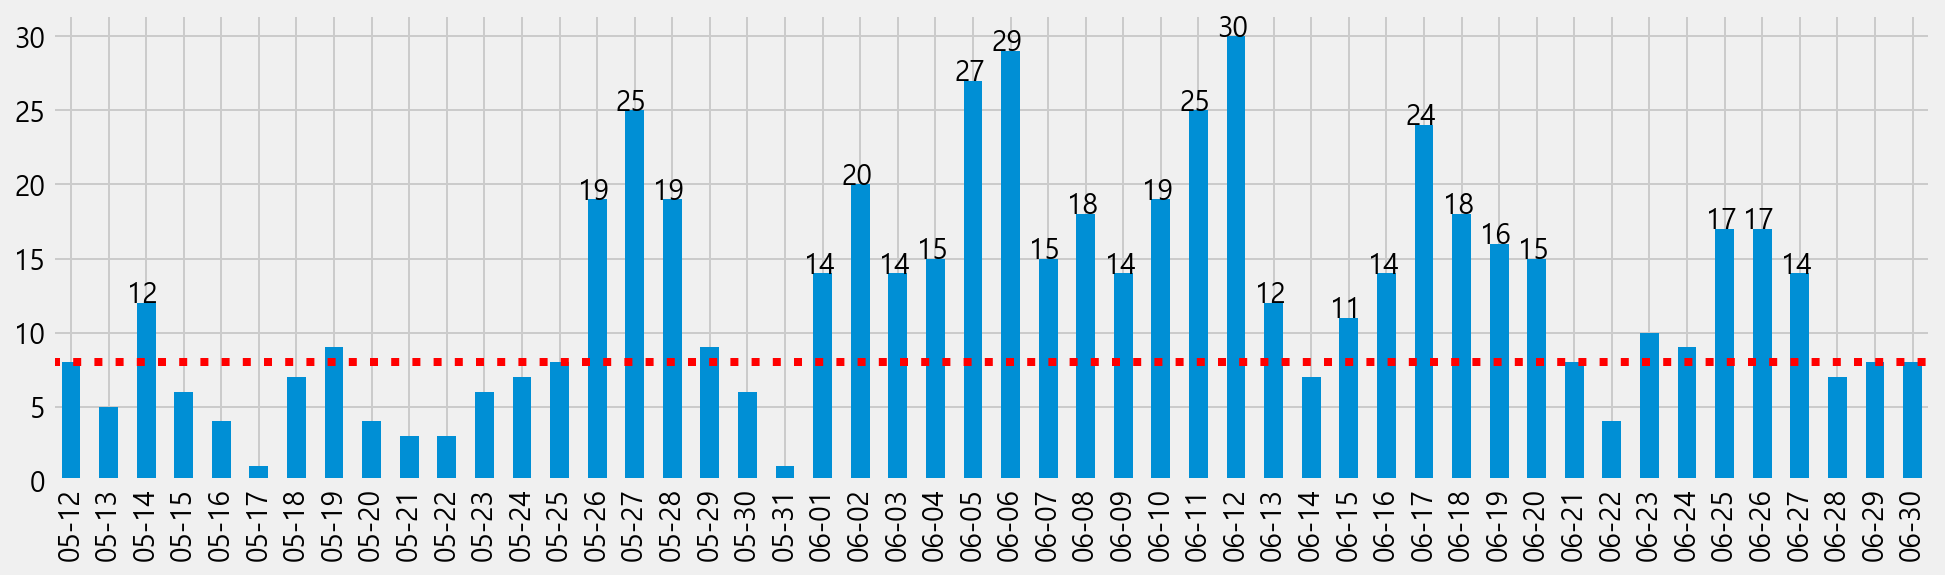

In [47]:
g = day_count[-50:].plot.bar(figsize=(15,4))
g.axhline(day_count.median(), linestyle=":", color="red")
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

In [ ]:
changing check